In [21]:
import pandas as pd
import numpy as np

import sklearn 

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
#from sklearn.svm import SVR

from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

#from sklearn.metrics import make_scorer

from matplotlib import pyplot
import seaborn as sns

In [22]:
# Basic Ordinal Encoded Dataset for Non-Linear Models
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')

X_o = ordinal.drop(['SalePrice'], axis=1).values
y_o = ordinal.SalePrice.values

scaler_o = StandardScaler()
X_o = scaler_o.fit_transform(X_o)

In [23]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../Data/BaseData.csv')

X_b = base.drop(['SalePrice'], axis=1).values
y_b = base.SalePrice.values

scaler_b = StandardScaler()
X_b = scaler_b.fit_transform(X_b)

In [24]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('ridge', Ridge()))
    #level0.append(('cart', DecisionTreeRegressor()))
    #level0.append(('svm', SVR()))
    # define meta learner model
    level1 = GradientBoostingRegressor()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5) 
    return model

In [25]:
def get_models():
    models = dict()
    models['ridge'] = Ridge() 
    models['gradient boost'] = GradientBoostingRegressor() 
    models['stacking'] = get_stacking() 
    return models

In [26]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [27]:
def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [28]:
df_ridge = evaluate_model(Ridge(), X_b, y_b)

In [29]:
df_ridge

,fit_time,score_time,test_r2,test_neg_mae
0,0.020833,0.000744,0.906156,-15376.607522
1,0.020825,0.000748,0.858142,-14672.309750
2,0.020866,0.000743,0.776891,-17184.203865
3,0.029019,0.000591,0.921214,-14480.647001
4,0.020927,0.000766,0.943580,-12824.545009


In [30]:
df_gbm = evaluate_model(GradientBoostingRegressor(), X_o, y_o)

In [31]:
df_gbm

,fit_time,score_time,test_r2,test_neg_mae
0,0.938929,0.001829,0.920065,-14220.223546
1,0.934201,0.001217,0.832747,-13944.887391
2,0.930317,0.001482,0.919828,-14131.875073
3,0.984928,0.001204,0.904726,-13581.528823
4,0.934038,0.001589,0.927049,-13472.457807


In [32]:
df_stack = evaluate_model(get_stacking(), X_b, y_b)

In [34]:
df_stack.describe()

,fit_time,score_time,test_r2,test_neg_mae
count,5.000000,5.000000,5.000000,5.000000
mean,0.160006,0.001001,0.857099,-15031.881584
std,0.007975,0.000033,0.059020,1404.486334
min,0.151917,0.000974,0.810959,-16724.340916
25%,0.152628,0.000977,0.814665,-15649.305784
50%,0.159188,0.000980,0.818523,-15193.775571
75%,0.167346,0.001030,0.905973,-14680.199955
max,0.168949,0.001044,0.935374,-12911.785692


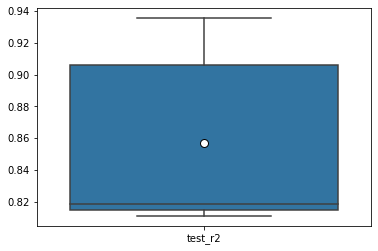

In [35]:
sns.boxplot(data=df_stack[['test_r2']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});